In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

### 團體練習第一題

In [2]:
X, y= make_classification(n_samples=300, n_features=2,n_informative=2,flip_y=0.2,
                          n_redundant=0,n_clusters_per_class=1,n_classes=2,class_sep=2,random_state=2030)

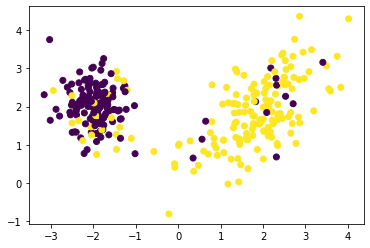

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

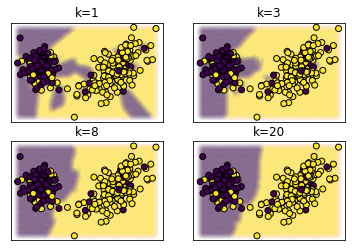

In [14]:
ks=[1,3,8,20]
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    xx = np.arange(np.min(X[:,0]),np.max(X[:,0]),0.05)
    yy = np.arange(np.min(X[:,1]),np.max(X[:,1]),0.05)
    xx,yy = np.meshgrid(xx,yy)
    test=np.vstack((xx.flat[:],yy.flat[:]))
    test=test.T
    yhat = knn.predict(test)
    plt.Figure(figsize=(12, 8))
    plt.subplot(2,2,ks.index(k)+1)
    plt.scatter(xx.flat[:],yy.flat[:],c=yhat,alpha=0.01)
    plt.scatter(X[:,0],X[:,1],c=y,edgecolors='k')
    plt.xticks([])
    plt.yticks([])
    plt.title(f'k={k}')
plt.show()

### 團體練習第二題

In [8]:
X,y = make_regression(n_samples=1000, n_features=1000, n_informative=10, noise=20, random_state=99)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [9]:
linearReg = LinearRegression()
linearReg.fit(x_train,y_train)
yhat = linearReg.predict(x_test)
mse_linearReg=mean_squared_error(y_test,yhat)

In [10]:
mse_linearRidge=[]
alpha_set = 2**np.arange(0,7)

for alpha in alpha_set:
    linearRidge = Ridge(alpha=alpha)
    linearRidge.fit(x_train,y_train)
    yhat = linearRidge.predict(x_test)
    mse_linearRidge.append(mean_squared_error(y_test,yhat))

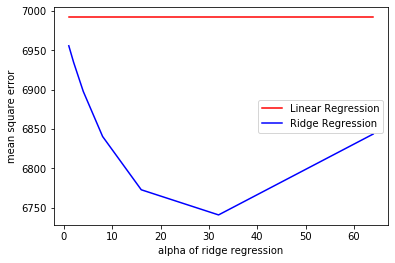

In [11]:
plt.plot(alpha_set,mse_linearReg*np.ones((len(alpha_set),1)),'r-')
plt.plot(alpha_set,mse_linearRidge,'b-')
plt.legend(['Linear Regression','Ridge Regression'])
plt.xlabel('alpha of ridge regression')
plt.ylabel('mean square error')
plt.show()

### 團體第三題

In [32]:
X, y= make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                          n_clusters_per_class=1, class_sep=0.8, flip_y=0, weights=[0.95,0.05],
                          random_state=100)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [33]:
NB = GaussianNB()
NB.fit(x_train,y_train)
yhat = NB.predict(x_test)
metric_NB_acc = accuracy_score(y_test,yhat)
metric_NB_f1 = f1_score(y_test,yhat)
metric_NB_precision = precision_score(y_test,yhat)
metric_NB_recall = recall_score(y_test,yhat)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
yhat = knn.predict(x_test)
metric_knn_acc = accuracy_score(y_test,yhat)
metric_knn_f1 = f1_score(y_test,yhat)
metric_knn_precision = precision_score(y_test,yhat)
metric_knn_recall = recall_score(y_test,yhat)

weight=10
metric_logit_acc=[]
metric_logit_f1=[]
metric_logit_precision=[]
metric_logit_recall=[]
for i in range(1,weight+1):
    logit = LogisticRegression(class_weight={1:i,0:1})
    logit.fit(x_train,y_train)
    yhat = logit.predict(x_test)
    metric_logit_acc.append(accuracy_score(y_test,yhat))
    metric_logit_f1.append(f1_score(y_test,yhat))
    metric_logit_precision.append(precision_score(y_test,yhat))
    metric_logit_recall.append(recall_score(y_test,yhat))

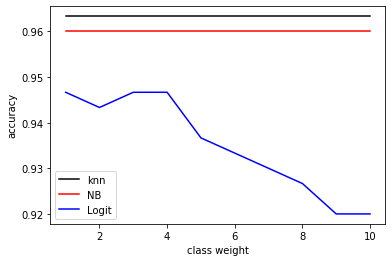

In [34]:
plt.plot(range(1,weight+1),metric_knn_acc*np.ones((weight,1)),'k-')
plt.plot(range(1,weight+1),metric_NB_acc*np.ones((weight,1)),'r-')
plt.plot(range(1,weight+1),metric_logit_acc,'b-')
plt.legend(['knn','NB','Logit'])
plt.xlabel('class weight')
plt.ylabel('accuracy')
plt.show()

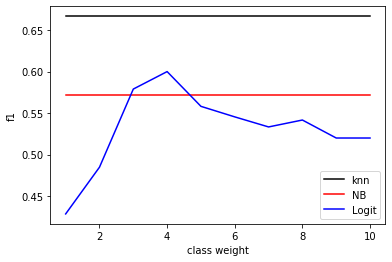

In [35]:
plt.plot(range(1,weight+1),metric_knn_f1*np.ones((weight,1)),'k-')
plt.plot(range(1,weight+1),metric_NB_f1*np.ones((weight,1)),'r-')
plt.plot(range(1,weight+1),metric_logit_f1,'b-')
plt.legend(['knn','NB','Logit'])
plt.xlabel('class weight')
plt.ylabel('f1')
plt.show()

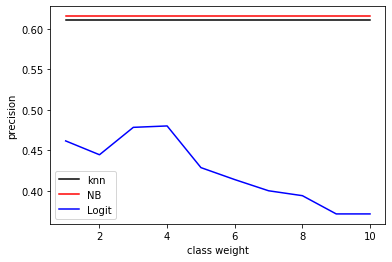

In [36]:
plt.plot(range(1,weight+1),metric_knn_precision*np.ones((weight,1)),'k-')
plt.plot(range(1,weight+1),metric_NB_precision*np.ones((weight,1)),'r-')
plt.plot(range(1,weight+1),metric_logit_precision,'b-')
plt.legend(['knn','NB','Logit'])
plt.xlabel('class weight')
plt.ylabel('precision')
plt.show()

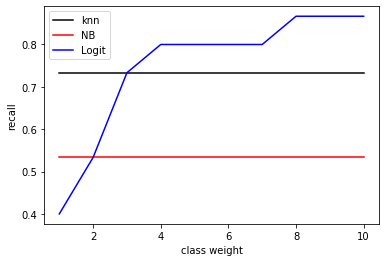

In [37]:
plt.plot(range(1,weight+1),metric_knn_recall*np.ones((weight,1)),'k-')
plt.plot(range(1,weight+1),metric_NB_recall*np.ones((weight,1)),'r-')
plt.plot(range(1,weight+1),metric_logit_recall,'b-')
plt.legend(['knn','NB','Logit'])
plt.xlabel('class weight')
plt.ylabel('recall')
plt.show()

### 團體第四題

In [47]:
df = pd.read_csv('airfoil_self_noise.dat',sep='\t',header=None)

In [48]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [49]:
X = df.iloc[:,0:5]
y = df.iloc[:,5]

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### for KNN

In [53]:
k_set = range(1,12)
best_R2=0
for k in k_set:
    knn = KNeighborsRegressor(n_neighbors=k)
    cv_results = cross_validate(knn,x_train,y_train)
    if np.mean(cv_results['test_score'])>best_R2:
        best_k = k
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(x_train,y_train)
knn_R2 = knn.score(x_test,y_test)
print(knn_R2)

0.2424339969138658


### for linear regression

In [22]:
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)
linear_reg_R2 = linear_reg.score(x_test,y_test)
print(linear_reg_R2)

0.5526966812426878


### for Ridge regression

In [23]:
alpha_set = np.arange(0.1,2.1,0.2)
best_R2=0
for alpha in alpha_set:
    rig = Ridge(alpha=alpha)
    cv_results = cross_validate(rig,x_train,y_train)
    if np.mean(cv_results['test_score'])>best_R2:
        best_alpha = alpha
rig = Ridge(alpha=best_alpha)
rig.fit(x_train,y_train)
rig_R2 = rig.score(x_test,y_test)
print(rig_R2)

0.5523403607096248
